# Imports

In [100]:
import pandas as pd
import numpy as np
import math

# models
from catboost import Pool, CatBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

# processing
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# config
pd.set_option('display.max_columns', 50)
path = 'datasets/kaggle/Apartment-rental-offers-in-Germany/'

# Load Data

In [2]:
data = pd.read_csv(path+'immo_data.csv')
print(data.shape)
display(data.head())
display(data.info())
display(data.describe())

(268850, 49)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

None

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


# Data Preprocessing

In [3]:
null_count = data.isnull().sum().sort_values(ascending = False)
null_count = null_count[null_count>0]
null_count

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructedRange         57045
yearConstructed              57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
dtype: int64

### nulls

In [4]:
drop_features = null_count[null_count > data.shape[0] * 0.7]
print(drop_features)
data = data.drop(drop_features.index, axis=1)

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
dtype: int64


In [5]:
text_features = ['description', 'facilities', 'streetPlain']
data[text_features] = data[text_features].fillna(' ')

In [6]:
fill_with_zero_features = ['noParkSpaces']
data[fill_with_zero_features] = data[fill_with_zero_features].fillna(0)

In [7]:
fill_with_average_features = ['heatingCosts', 'thermalChar', 'yearConstructedRange', 'totalRent',
                              'telekomUploadSpeed', 'serviceCharge', 'pricetrend', 'yearConstructed']
data[fill_with_average_features] = data[fill_with_average_features].fillna(data[fill_with_average_features].mean())

In [8]:
fill_with_one_features = ['numberOfFloors', 'floor']
data[fill_with_one_features] = data[fill_with_one_features].fillna(1)

In [9]:
data.loc[data.lastRefurbish.isna(), 'lastRefurbish'] = data[data.lastRefurbish.isna()].yearConstructed

In [10]:
data = data.drop('houseNumber', axis=1)

In [11]:
fill_with_model = ['petsAllowed', 'interiorQual', 'condition', 'firingTypes', 'heatingType', 'typeOfFlat', 'telekomTvOffer']
train_features = [item for item in data.columns if item not in fill_with_model + ['livingSpace', 'street', 'scoutId', 'description', 'facilities', 'date', 'streetPlain']]

In [12]:
for feat in fill_with_model:
    print(feat)
    train = data[~data[feat].isna()]
    test = data[data[feat].isna()]

    train_data = train[train_features]
    eval_data = test[train_features]
    cat_features = ['regio1', 'newlyConst', 'balcony', 'hasKitchen', 'geo_bln', 'cellar', 'geo_krs', 'lift', 'garden','regio2', 'regio3']
    train_label = train[feat]
    train_dataset = Pool(data=train_data,
                         label=train_label,
                         cat_features=cat_features)
    eval_dataset = Pool(data=eval_data,
                        cat_features=cat_features)

    # Initialize CatBoostClassifier
    model = CatBoostClassifier(iterations=10,
                               learning_rate=1,
                               depth=2,
                               loss_function='MultiClass')
    # Fit model
    model.fit(train_dataset)
    predicted = model.predict(eval_dataset)
    data.loc[data[feat].isna(), feat] = predicted

petsAllowed
0:	learn: 0.7830814	total: 391ms	remaining: 3.52s
1:	learn: 0.7624724	total: 458ms	remaining: 1.83s
2:	learn: 0.7462200	total: 530ms	remaining: 1.24s
3:	learn: 0.7378226	total: 606ms	remaining: 909ms
4:	learn: 0.7281727	total: 675ms	remaining: 675ms
5:	learn: 0.7240437	total: 744ms	remaining: 496ms
6:	learn: 0.7178182	total: 810ms	remaining: 347ms
7:	learn: 0.7149832	total: 881ms	remaining: 220ms
8:	learn: 0.7110573	total: 946ms	remaining: 105ms
9:	learn: 0.7084732	total: 1.14s	remaining: 0us
interiorQual
0:	learn: 0.7917386	total: 94.6ms	remaining: 852ms
1:	learn: 0.7244619	total: 187ms	remaining: 749ms
2:	learn: 0.6943131	total: 269ms	remaining: 628ms
3:	learn: 0.6799157	total: 352ms	remaining: 528ms
4:	learn: 0.6700533	total: 433ms	remaining: 433ms
5:	learn: 0.6688319	total: 514ms	remaining: 342ms
6:	learn: 0.6604992	total: 612ms	remaining: 262ms
7:	learn: 0.6549367	total: 697ms	remaining: 174ms
8:	learn: 0.6503082	total: 774ms	remaining: 86.1ms
9:	learn: 0.6471044	total

In [13]:
null_count = data.isnull().sum().sort_values(ascending = False)
null_count = null_count[null_count>0]
print(null_count)


Series([], dtype: int64)


In [14]:
# data.to_csv(path+'null_filled.csv', index = None)
# data = pd.read_csv(path+'null_filled.csv')

### outliers

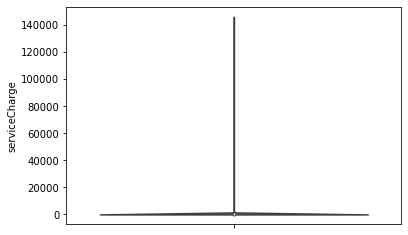

serviceCharge


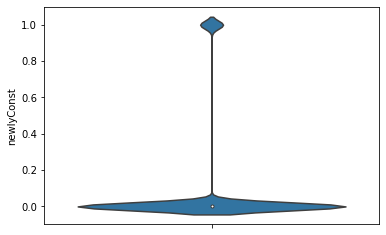

newlyConst


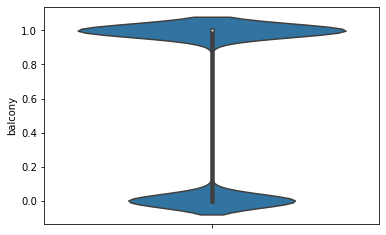

balcony


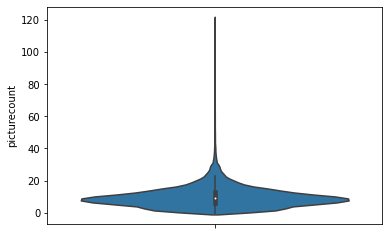

picturecount


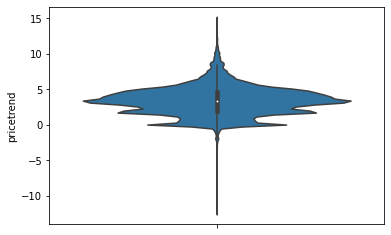

pricetrend


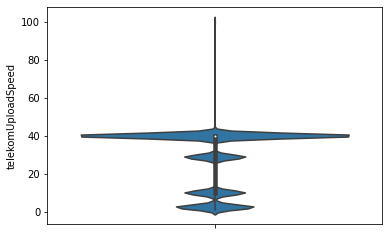

telekomUploadSpeed


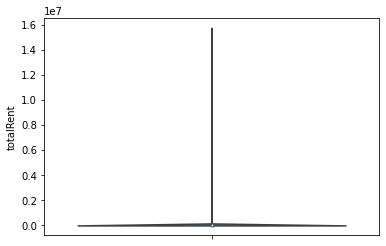

totalRent


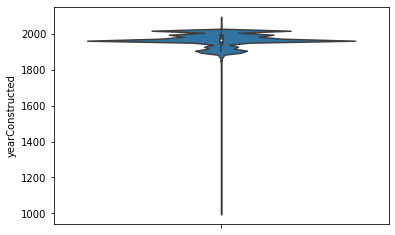

yearConstructed


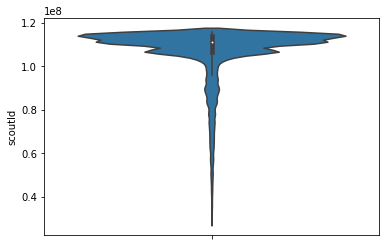

scoutId


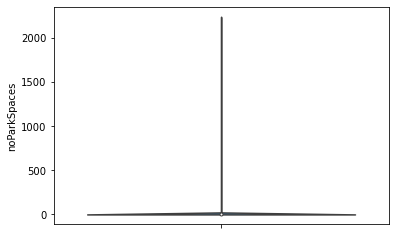

noParkSpaces


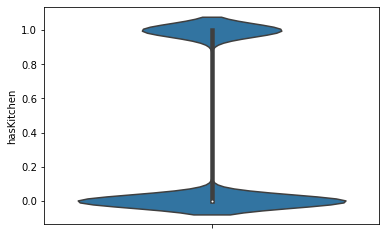

hasKitchen


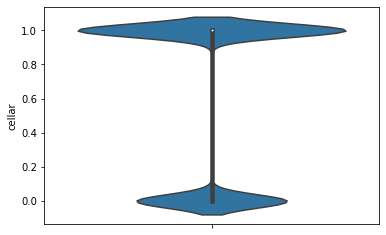

cellar


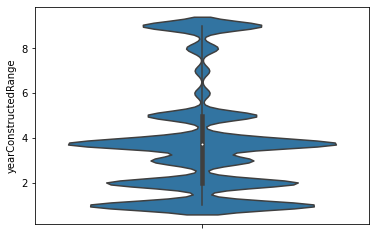

yearConstructedRange


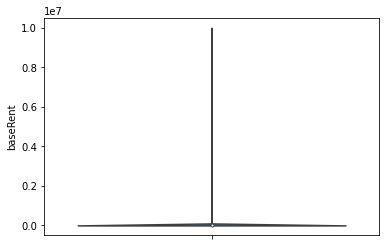

baseRent


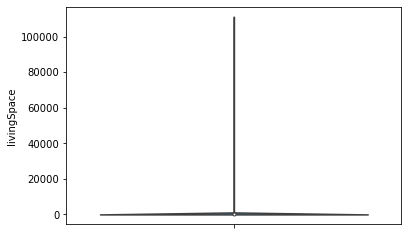

livingSpace


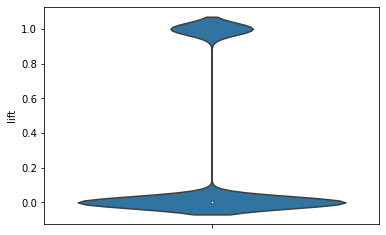

lift


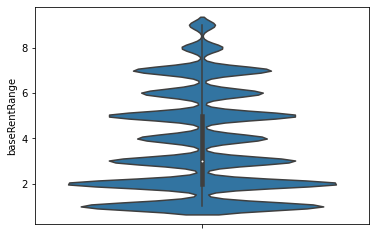

baseRentRange


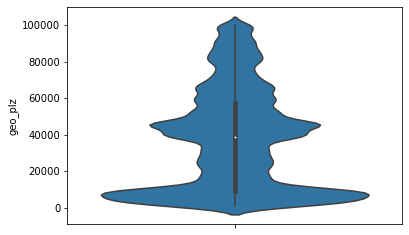

geo_plz


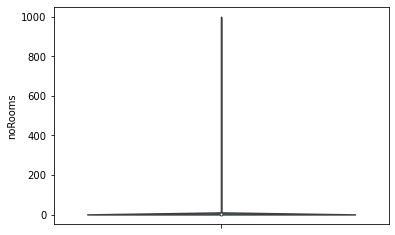

noRooms


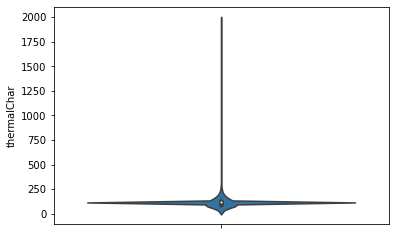

thermalChar


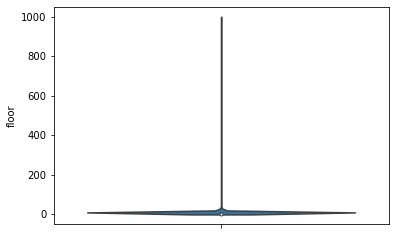

floor


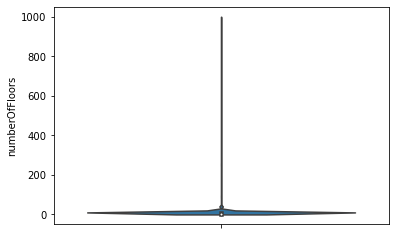

numberOfFloors


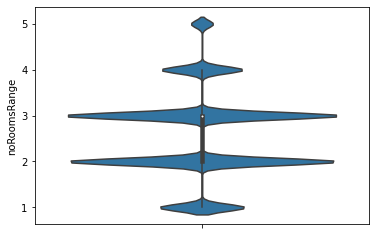

noRoomsRange


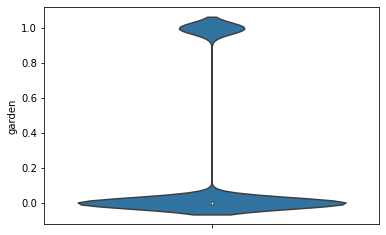

garden


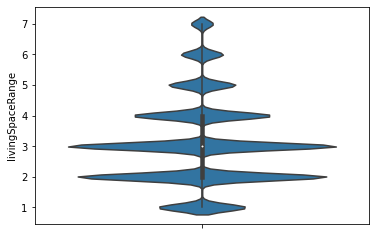

livingSpaceRange


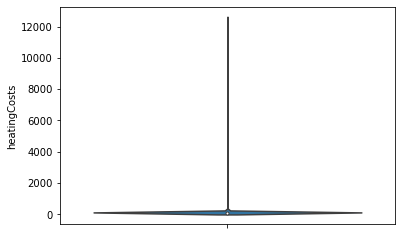

heatingCosts


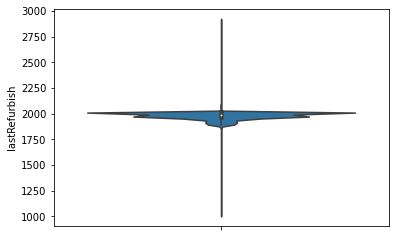

lastRefurbish


In [15]:
for i in data.columns:
    try:
        sns.violinplot(y = data[i])
        plt.show()
        print(i)
    except:
        pass

In [16]:
q1=[]
q3=[]
outliers_removal_features = ['serviceCharge','totalRent','yearConstructed','noParkSpaces','baseRent','livingSpace','noRooms','thermalChar','floor','numberOfFloors','heatingCosts','lastRefurbish']
for feat in outliers_removal_features:
    q1.append(data[feat].quantile(.05))
    q3.append(data[feat].quantile(.95))
    
iqr = data.copy()
for i in range(len(outliers_removal_features)):
    feat = outliers_removal_features[i]
    mask = iqr[feat].between(q1[i], q3[i], inclusive=True)
    before = iqr.shape[0]
    iqr = iqr.loc[mask]
    print('{} : {} -> {}'.format(feat, before, iqr.shape[0]))

serviceCharge : 268850 -> 247494
totalRent : 247494 -> 230209
yearConstructed : 230209 -> 213178
noParkSpaces : 213178 -> 206807
baseRent : 206807 -> 203218
livingSpace : 203218 -> 193393
noRooms : 193393 -> 190399
thermalChar : 190399 -> 173655
floor : 173655 -> 169881
numberOfFloors : 169881 -> 163308
heatingCosts : 163308 -> 150862
lastRefurbish : 150862 -> 142797


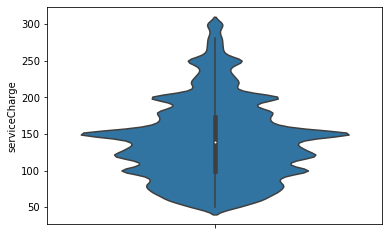

serviceCharge


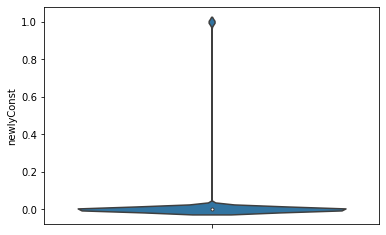

newlyConst


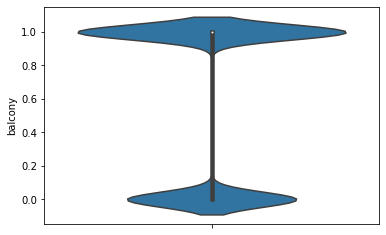

balcony


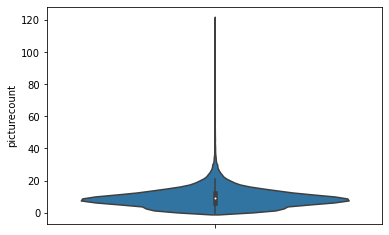

picturecount


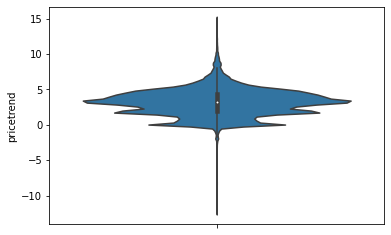

pricetrend


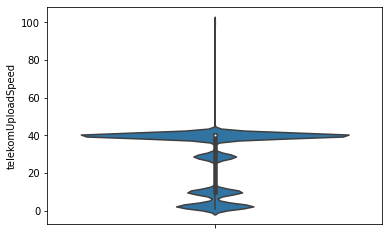

telekomUploadSpeed


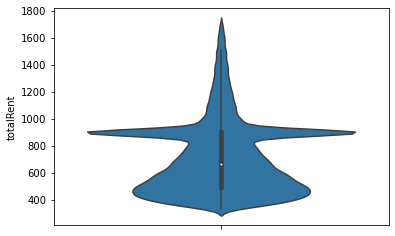

totalRent


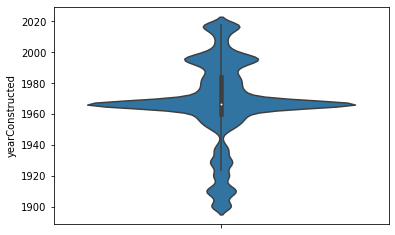

yearConstructed


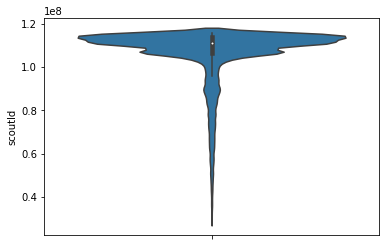

scoutId


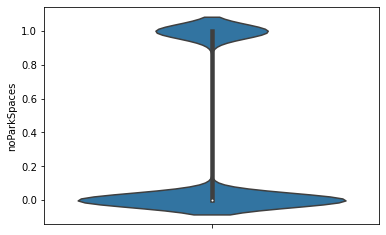

noParkSpaces


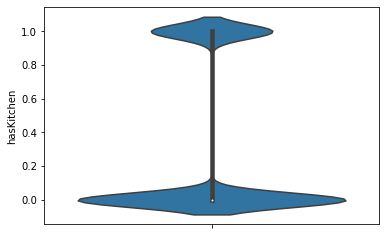

hasKitchen


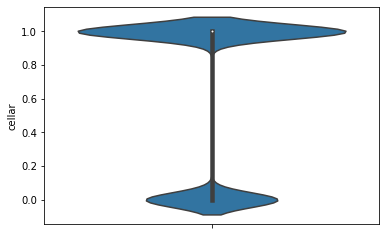

cellar


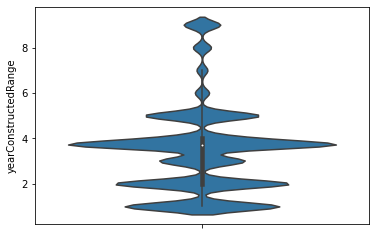

yearConstructedRange


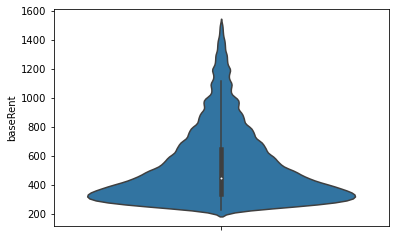

baseRent


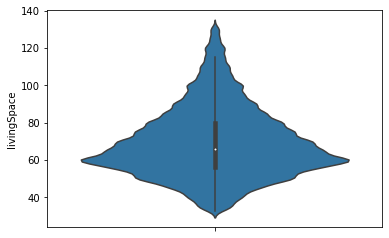

livingSpace


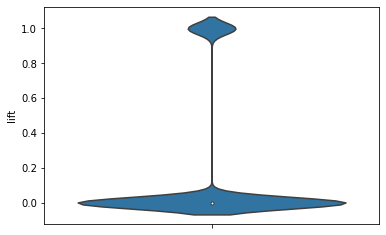

lift


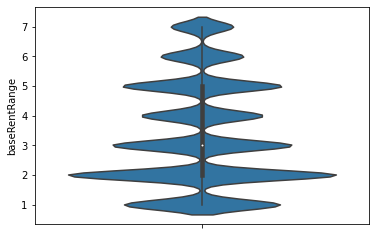

baseRentRange


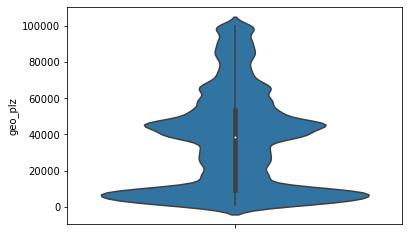

geo_plz


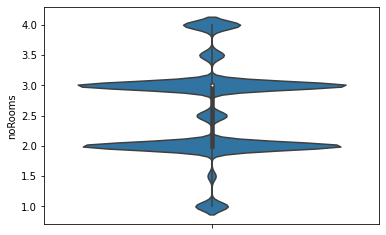

noRooms


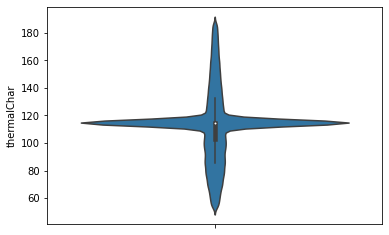

thermalChar


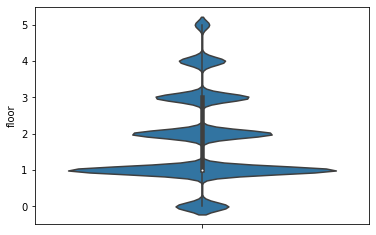

floor


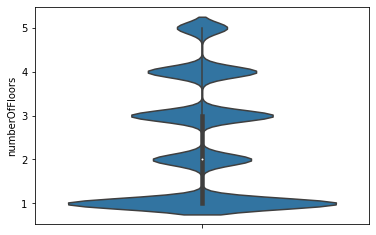

numberOfFloors


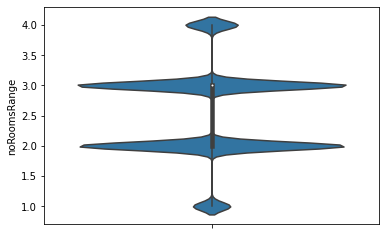

noRoomsRange


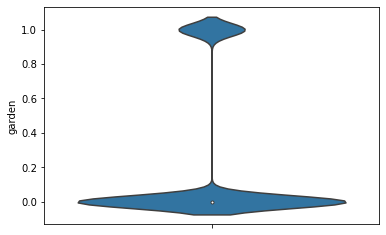

garden


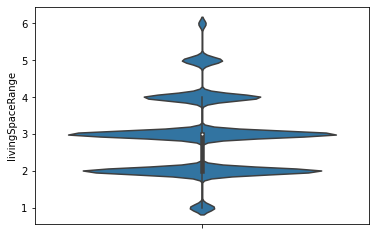

livingSpaceRange


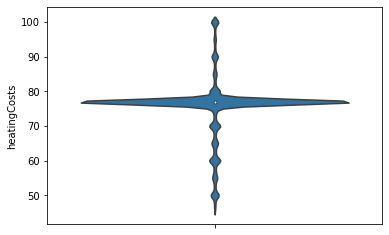

heatingCosts


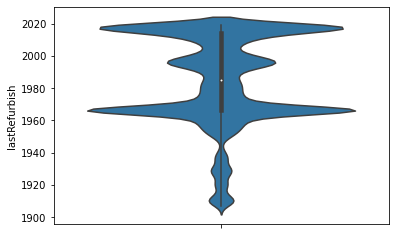

lastRefurbish


In [17]:
for i in iqr.columns:
    try:
        sns.violinplot(y = iqr[i])
        plt.show()
        print(i)
    except:
        pass

looks ok 

In [18]:
data = iqr.copy()

### Cleaning and Feature Engineering

In [19]:
data.date.unique()

array(['May19', 'Feb20', 'Oct19', 'Sep18'], dtype=object)

In [20]:
label_encoding_faetures = ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden', 'date']
for feat in label_encoding_faetures:
    le = preprocessing.LabelEncoder()
    le.fit(data[feat])
    data[feat] = le.transform(data[feat])

In [21]:
one_hot_features = ['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition', 
                    'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'typeOfFlat','regio2','regio3']
for feat in one_hot_features:
    print(feat,'\t\t',len(data[feat].unique()))

regio1 		 16
heatingType 		 13
telekomTvOffer 		 3
firingTypes 		 85
geo_bln 		 16
geo_krs 		 419
condition 		 10
interiorQual 		 4
petsAllowed 		 3
street 		 35339
streetPlain 		 36538
typeOfFlat 		 10
regio2 		 419
regio3 		 7516


In [22]:
drop_features = ['street', 'streetPlain', 'regio1', 'regio2', 'regio3']
data = data.drop(drop_features, axis=1)

In [23]:
# i don't know anything about German Language
data = data.drop(['description','facilities'], axis = 1)

In [24]:
one_hot_features = ['heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition', 
                    'interiorQual', 'petsAllowed', 'typeOfFlat']
df = data.copy()
for feat in one_hot_features:
    one_hot = pd.get_dummies(df[feat])
    # Drop column B as it is now encoded
    df = df.drop(feat, axis = 1)
    # Join the encoded df
    df = df.join(one_hot,rsuffix='_r')
df.head()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,...,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,refurbished,ripe_for_demolition,well_kept,luxury,normal,simple,sophisticated,negotiable_r,no,yes,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat
0,245.00,0,0,6,4.62,10.0,840.000000,1965.00000,96107057,1.0,0,1,2.000000,595.0,86.00,0,4,44269,4.0,181.400000,1.0,3.0,4,1,4,...,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,58.15,0,1,9,1.53,40.0,901.331522,1964.00000,108890903,0.0,0,0,2.000000,343.0,58.15,0,2,9599,3.0,86.000000,3.0,1.0,3,0,2,...,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,142.00,0,1,5,4.48,2.4,901.331522,1999.00000,115531145,0.0,1,0,5.000000,315.2,53.43,0,2,24891,2.0,165.000000,1.0,1.0,2,0,2,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6,70.00,0,0,9,1.01,2.4,380.000000,1966.40059,114391930,0.0,0,1,3.714544,310.0,62.00,0,2,9599,2.0,114.749533,1.0,4.0,2,1,3,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,110.00,0,0,5,3.77,40.0,690.000000,1970.00000,106416361,1.0,1,1,2.000000,580.0,53.00,0,4,79211,2.0,138.000000,2.0,2.0,2,0,2,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [87]:
# df.to_csv(path+'one_hot.csv', index = None)
# df = pd.read_csv(path+'one_hot.csv')

# Modeling

In [55]:
def reg_report(true, pred, name='Test'):
    print("\n{} Results :\n".format(name))
    print("R Squared :",1-(sum((pred-true)**2)/sum((true-true.mean())**2)))
    print("MSE :",((pred-true)**2).mean())
    print('Accuracy with 10% :', ((pred<=true*1.1) & (true*0.9<=pred)).mean())

def accuracy_with_percentage(clf, X, y):
    pred = clf.predict(X)
    return ((pred<=y*1.1) & (y*0.9<=pred)).mean()

In [35]:
data = pd.read_csv(path+'one_hot.csv')
x = data.drop(['Berlin_r', 'Hamburg_r',  'livingSpace'], axis = 1)
y = data['livingSpace']
print(x.shape)

(142797, 588)


In [28]:
corrMatrix = data.corr()
a = corrMatrix['livingSpace'].sort_values(ascending=False)
a

livingSpace           1.000000
livingSpaceRange      0.953983
noRooms               0.668460
noRoomsRange          0.658352
baseRentRange         0.625771
                        ...   
negotiable_r         -0.091375
Sachsen_Anhalt       -0.096176
district_heating_r   -0.102381
Sachsen              -0.107303
normal               -0.278525
Name: livingSpace, Length: 591, dtype: float64

# K folds

In [101]:
scoring={'MSE': 'neg_mean_squared_error', 'Accuracy': accuracy_with_percentage}
def prep_result(temp, model = '', dataset = ''):
    n_temp = {}
    n_temp['model'] = model
    n_temp['dataset'] = dataset
    for key, value in temp.items():
        if 'time' in key:
            n_temp['{}_mean'.format(key)] = value.mean()
            n_temp['{}_variance'.format(key)] = value.var()
            continue
        if 'MSE' in key:
            value = -value
        n_temp['{}_mean'.format(key.split('_')[1])] = value.mean()
        n_temp['{}_variance'.format(key.split('_')[1])] = value.var()
    for key, value in temp.items():
        if 'time' in key:
            continue
        if 'MSE' in key:
            value = -value
        for i in range(len(value)):
            n_temp['{}_fold_{}'.format(key.split('_')[1], i+1)] = value[i]
    return n_temp

# From Scratch Regression

In [97]:
# Ordinary least squares
class My_LinearRegression(BaseEstimator):
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        x = np.c_[np.ones(len(x)),x]
        y = y.values
    
        xT = x.transpose()
        inversed = np.linalg.inv( xT.dot(x) )
        betas = inversed.dot( xT ).dot(y)
        
        self.intercept = betas[0]
        self.coefficients = betas[1:]

    def predict(self, x):
        return np.multiply(x, self.coefficients).sum(axis = 1) + self.intercept


# experiments

In [112]:
def experiment(cv = 5):
    results = []

    temp = cross_validate(My_LinearRegression(), x['livingSpaceRange'].values.reshape(1, -1).T, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'my linear regression', 'most correlation'))
    temp = cross_validate(LinearRegression(), x['livingSpaceRange'].values.reshape(1, -1).T, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'most correlation'))

    temp = cross_validate(LinearRegression(), x[['livingSpaceRange', 'noRooms', 'Sachsen', 'normal']], y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'top 2 & tail 2 correlation'))

    temp = cross_validate(LinearRegression(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'all features'))

    temp = cross_validate(Lasso(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'lasso', 'all features'))
    temp = cross_validate(Ridge(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'ridge', 'all features'))
    
    return pd.DataFrame(results)

In [113]:
%%time
r = experiment(cv = 5)
display(r)
r.to_csv(path+'reuslt_cv_5.csv', index = False)

r = experiment(cv = 10)
display(r)
r.to_csv(path+'reuslt_cv_10.csv', index = False)

E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.78287e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.76532e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.7693e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.74732e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.74179e-20): result may not be accurate.
  overwrite_a=True).T


,model,dataset,fit_time_mean,fit_time_variance,score_time_mean,score_time_variance,MSE_mean,MSE_variance,Accuracy_mean,Accuracy_variance,MSE_fold_1,MSE_fold_2,MSE_fold_3,MSE_fold_4,MSE_fold_5,Accuracy_fold_1,Accuracy_fold_2,Accuracy_fold_3,Accuracy_fold_4,Accuracy_fold_5
0,my linear regression,most correlation,0.006444,2.485787e-06,0.006432,7.785647e-07,31.472794,2.465862e-02,0.706759,0.000015,31.537506,31.357148,31.561019,31.233636,31.674663,0.701996,0.711239,0.702686,0.710529,0.707343
1,linear regression,most correlation,0.010380,2.330396e-07,0.008276,1.744626e-07,31.472794,2.465862e-02,0.706759,0.000015,31.537506,31.357148,31.561019,31.233636,31.674663,0.701996,0.711239,0.702686,0.710529,0.707343
2,linear regression,top 2 & tail 2 correlation,0.031525,3.655385e-05,0.014761,5.331720e-06,28.545254,1.429393e-02,0.760660,0.000006,28.416735,28.520888,28.511638,28.504642,28.772365,0.760644,0.762780,0.757029,0.763892,0.758955
3,linear regression,all features,5.755781,3.396843e-02,0.315885,1.266479e-03,4590.197436,2.668077e+07,0.820647,0.000002,5642.614526,2061.122251,874.097526,164.884902,14208.267975,0.821639,0.822724,0.819041,0.820722,0.819111
4,lasso,all features,10.239486,1.613289e+01,0.304115,1.143219e-03,28.828279,6.613100e-02,0.790563,0.000005,28.757941,28.563697,28.696906,28.806742,29.316112,0.788235,0.793768,0.790154,0.792360,0.788298
5,ridge,all features,2.632639,2.846550e-02,0.313755,9.467850e-05,24.219867,1.806463e-02,0.820879,0.000002,24.046404,24.237197,24.124917,24.246928,24.443888,0.821814,0.823249,0.819251,0.821002,0.819076


E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45397e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.47142e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45116e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.46051e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.46608e-20): result may not be accurate.
  overwrite_a=True).T
E:\ProgramData\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rc

,model,dataset,fit_time_mean,fit_time_variance,score_time_mean,score_time_variance,MSE_mean,MSE_variance,Accuracy_mean,Accuracy_variance,MSE_fold_1,MSE_fold_2,MSE_fold_3,MSE_fold_4,MSE_fold_5,MSE_fold_6,MSE_fold_7,MSE_fold_8,MSE_fold_9,MSE_fold_10,Accuracy_fold_1,Accuracy_fold_2,Accuracy_fold_3,Accuracy_fold_4,Accuracy_fold_5,Accuracy_fold_6,Accuracy_fold_7,Accuracy_fold_8,Accuracy_fold_9,Accuracy_fold_10
0,my linear regression,most correlation,0.009430,0.000010,0.005679,1.750719e-06,31.472292,5.578410e-02,0.706759,0.000021,31.519399,31.554236,31.308777,31.405889,31.220150,31.899261,31.420921,31.046102,31.618594,31.729589,0.703571,0.700490,0.714916,0.707283,0.705322,0.699930,0.711204,0.709994,0.709573,0.705301
1,linear regression,most correlation,0.012249,0.000011,0.007033,9.394775e-08,31.472292,5.578410e-02,0.706759,0.000021,31.519399,31.554236,31.308777,31.405889,31.220150,31.899261,31.420921,31.046102,31.618594,31.729589,0.703571,0.700490,0.714916,0.707283,0.705322,0.699930,0.711204,0.709994,0.709573,0.705301
2,linear regression,top 2 & tail 2 correlation,0.036904,0.000060,0.015550,4.790380e-06,28.544395,4.701244e-02,0.760401,0.000015,28.426707,28.402688,28.454613,28.584411,28.224900,28.796493,28.670916,28.336607,28.553176,28.993438,0.759594,0.761064,0.764426,0.761204,0.759454,0.755182,0.767507,0.758667,0.762869,0.754044
3,linear regression,all features,6.479839,0.021762,0.159403,9.187762e-05,42969.217898,7.653751e+09,0.820780,0.000010,3572.502949,306.161530,29.268421,92.057847,30.654955,481.999517,164214.673207,260809.268175,129.718250,25.874129,0.821008,0.822269,0.826611,0.820168,0.821218,0.816947,0.825560,0.816934,0.817984,0.819105
4,lasso,all features,9.378368,22.583527,0.169506,4.910026e-04,28.825265,1.053219e-01,0.790633,0.000008,28.828194,28.659637,28.320193,28.863270,28.346136,29.023486,28.970655,28.645913,29.318850,29.276317,0.789496,0.787745,0.796289,0.791457,0.792997,0.787395,0.793277,0.790952,0.789061,0.787660
5,ridge,all features,2.918134,0.038872,0.164600,6.743352e-04,24.207721,4.705689e-02,0.820809,0.000010,24.029513,24.035580,24.155930,24.286894,23.849381,24.376814,24.461938,23.998008,24.329219,24.553929,0.820938,0.822549,0.826611,0.820098,0.821429,0.817087,0.825350,0.816864,0.818195,0.818965


Wall time: 4min 55s


In [137]:
['fold {}'.format(i) for i in range(1,6)]

['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

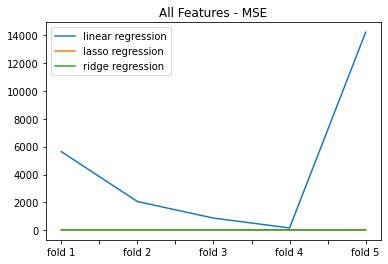

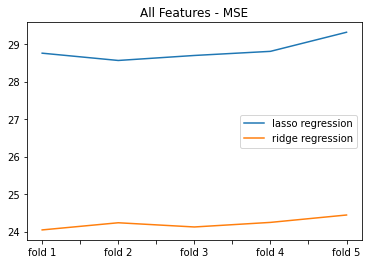

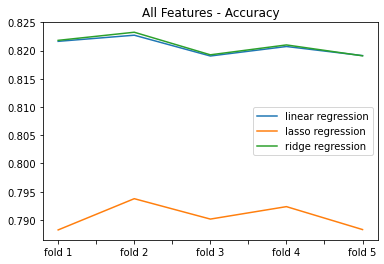

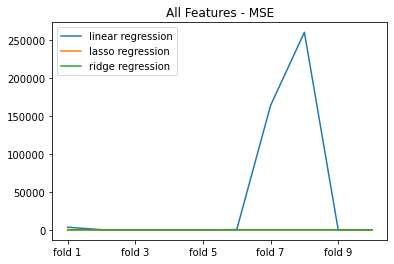

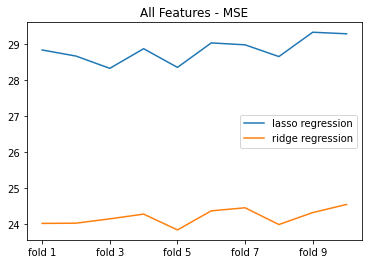

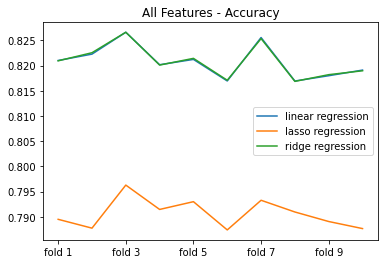

In [139]:
r = pd.read_csv(path+'reuslt_cv_5.csv')
cs = []
for c in r.columns:
    if 'MSE_fold' in c:
        cs.append(c)
t = r.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,6)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv5_mse_3.jpg')
plt.show()

t[['lasso regression', 'ridge regression']].plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv5_mse_2.jpg')
plt.show()


cs = []
for c in r.columns:
    if 'Accuracy_fold' in c:
        cs.append(c)
t = r.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,6)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - Accuracy')
plt.savefig(path+'cv5_accuracy_3.jpg')
plt.show()

r = pd.read_csv(path+'reuslt_cv_10.csv')
cs = []
for c in r.columns:
    if 'MSE_fold' in c:
        cs.append(c)
t = r.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,11)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv10_mse_3.jpg')
plt.show()

t[['lasso regression', 'ridge regression']].plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv10_mse_2.jpg')
plt.show()


cs = []
for c in r.columns:
    if 'Accuracy_fold' in c:
        cs.append(c)
t = r.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,11)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - Accuracy')
plt.savefig(path+'cv10_accuracy_3.jpg')
plt.show()

